In [66]:
import matplotlib.pyplot as plt
import numpy as np

from numba import jit

## Dyn Prog

In [68]:
def accel_asc(n):
    return set(accel_asc_yield(n))

def accel_asc_yield(n):
    a = [0 for i in range(n + 1)]
    k = 1
    y = n - 1
    while k != 0:
        x = a[k - 1] + 1
        k -= 1
        while 2 * x <= y:
            a[k] = x
            y -= x
            k += 1
        l = k + 1
        while x <= y:
            a[k] = x
            a[l] = y
            yield tuple(a[:k + 2])
            x += 1
            y -= 1
        a[k] = x + y
        y = x + y - 1
        yield tuple(a[:k + 1])

[(i,len(accel_asc(i))) for i in np.arange(1,10)]

[(1, 1), (2, 2), (3, 3), (4, 5), (5, 7), (6, 11), (7, 15), (8, 22), (9, 30)]

In [74]:
%%time
len(accel_asc(80))

CPU times: user 18.5 s, sys: 3.16 s, total: 21.6 s
Wall time: 21.8 s


15796476

## Euler Pentagonal Theorem

$$
p(n) = p(n-1) + p(n-2) - p(n-5) - p(n-7) + p(n-12) + p(n-15) - \cdots
$$
$$
p(n) = p(n-g_1) + p(n-g_2) - p(n-g_5) - p(n-g_7) + p(n-g_{12}) + p(n-g_{15}) - \cdots
$$

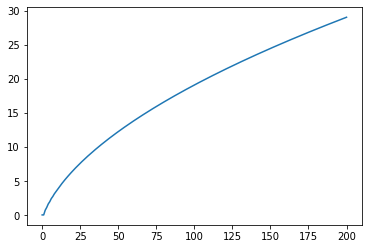

In [154]:
def gen_pent_seq(k):
    idx = [0]
    for i in np.arange(1, k):
        idx += [i,-i]
    return [(3*i*i - i)/2 for i in idx[1:]]

def partition(n_max):
    gid = {}
    for n in range(2,n_max+1):
        k=2
        while max(gen_pent_seq(k))<n:
            k+=1
        gid[n] = [int(i) for i in gen_pent_seq(k) if i<=n]

    p = {}
    p[0] = 1
    p[1] = 1

    for n in np.arange(2,n_max+1):
        p[n] = 0
        for i in np.arange(len(gid[n])):
            p[n] += int((-1)**np.floor(i/2)*p[n-gid[n][i]])
    return(p)


p = partition(200)
pk = list(p.keys())
pv = [float(x) for x in list(p.values())]
plt.plot(pk, np.log(pv))
plt.show()
#p_check = dict([(i,len(accel_asc(i))) for i in np.arange(0,n_max+1)])
#print(p_check)

In [153]:
partition(20)

{0: 1,
 1: 1,
 2: 2,
 3: 3,
 4: 5,
 5: 7,
 6: 11,
 7: 15,
 8: 22,
 9: 30,
 10: 42,
 11: 56,
 12: 77,
 13: 101,
 14: 135,
 15: 176,
 16: 231,
 17: 297,
 18: 385,
 19: 490,
 20: 627}

In [139]:
190569292 -1

190569291